In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [3]:
metro_df=pd.read_csv(r"C:\Users\FW154GQ\OneDrive - EY\Desktop\Personal\Delhi-Metro-Network.csv")
metro_df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [7]:
metro_df['Station Name'].unique().size

283

In [10]:
line_wise_stations=metro_df['Line'].value_counts()

In [13]:
#no. of lines on delhi metro
line_wise_stations.index.size

13

In [14]:
line_wise_stations

Line
Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: count, dtype: int64

In [31]:
station_layout=metro_df.groupby(['Line','Station Layout']).size().sort_values(ascending=False)
station_layout

Line               Station Layout
Blue line          Elevated          44
Red line           Elevated          29
Pink line          Elevated          26
Voilet line        Elevated          23
Aqua line          Elevated          21
Green line         Elevated          21
Yellow line        Underground       20
                   Elevated          17
Magenta line       Underground       15
Pink line          Underground       12
Rapid Metro        Elevated          11
Voilet line        Underground       11
Magenta line       Elevated          10
Blue line branch   Elevated           7
Orange line        Underground        5
Blue line          Underground        4
Gray line          Elevated           2
Green line branch  Elevated           2
Gray line          Underground        1
Green line branch  At-Grade           1
Blue line          At-Grade           1
Orange line        Elevated           1
Blue line branch   At-Grade           1
dtype: int64

In [73]:
#computing which line has the highest coverage from its starting point
lines=list(metro_df['Line'].unique())
for line in lines:
    dt=metro_df[metro_df['Line']==line]['Distance from Start (km)'].max()
    print("The maximum distance on the {a} is {b}".format(a=line,b=dt))

The maximum distance on the Red line is 32.7
The maximum distance on the Pink line is 52.6
The maximum distance on the Rapid Metro is 10.0
The maximum distance on the Magenta line is 33.1
The maximum distance on the Blue line is 52.7
The maximum distance on the Aqua line is 27.1
The maximum distance on the Voilet line is 43.5
The maximum distance on the Yellow line is 45.7
The maximum distance on the Green line is 24.8
The maximum distance on the Gray line is 3.9
The maximum distance on the Orange line is 20.8
The maximum distance on the Green line branch is 2.1
The maximum distance on the Blue line branch is 8.1


In [176]:
#alternate way
line_coverage=metro_df.groupby('Line')['Distance from Start (km)'].max()
line_coverage

Line
Aqua line            27.1
Blue line            52.7
Blue line branch      8.1
Gray line             3.9
Green line           24.8
Green line branch     2.1
Magenta line         33.1
Orange line          20.8
Pink line            52.6
Rapid Metro          10.0
Red line             32.7
Voilet line          43.5
Yellow line          45.7
Name: Distance from Start (km), dtype: float64

In [179]:
line_wise_stations
line_breakdown=pd.DataFrame({'Line': line_wise_stations.index,
             'No. of stations': line_wise_stations.values,
              'Average Distance': average_distance.values.round(2)})

In [180]:
line_breakdown

,Line,No. of stations,Average Distance
0,Blue line,49,1.36
1,Pink line,38,1.10
2,Yellow line,37,1.16
3,Voilet line,34,1.95
4,Red line,29,1.24
5,Magenta line,25,1.05
6,Aqua line,21,1.38
7,Green line,21,4.16
8,Rapid Metro,11,1.42
9,Blue line branch,8,1.00


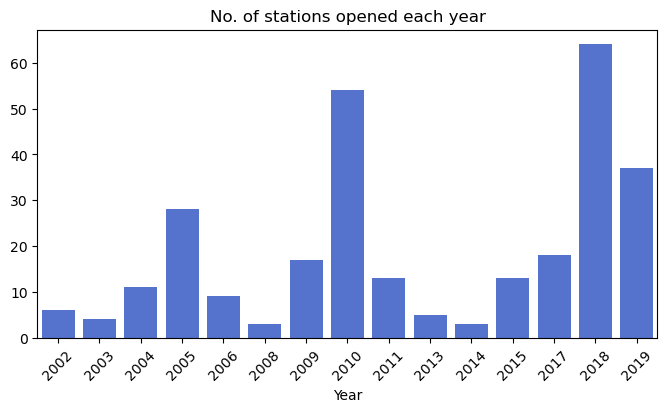

In [239]:
#Year-wise growth of metro stations
metro_df['Opening Date']=pd.to_datetime(metro_df['Opening Date'])
metro_df['Year']=metro_df['Opening Date'].dt.year
plt.figure(figsize=(8,4))
sns.barplot(x=metro_df.groupby('Year')['Station ID'].size().index,
            y=metro_df.groupby('Year')['Station ID'].size().values,
           color='royalblue')
plt.title("No. of stations opened each year")
plt.xticks(rotation=45)
plt.show()

In [208]:
layouts

['Elevated', 'Underground', 'At-Grade']

In [220]:
metro_df[metro_df['Line']=='Green line branch']

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude,Year
81,82,Satguru Ram Singh Marg,1.1,Green line branch,2011-08-24,Elevated,28.66199,77.15748,2011
111,112,Kirti Nagar [Conn: Blue],2.1,Green line branch,2011-08-27,At-Grade,28.65575,77.15057,2011
196,197,Ashok Park Main,0.0,Green line branch,2010-02-04,Elevated,28.67292,77.14420,2010


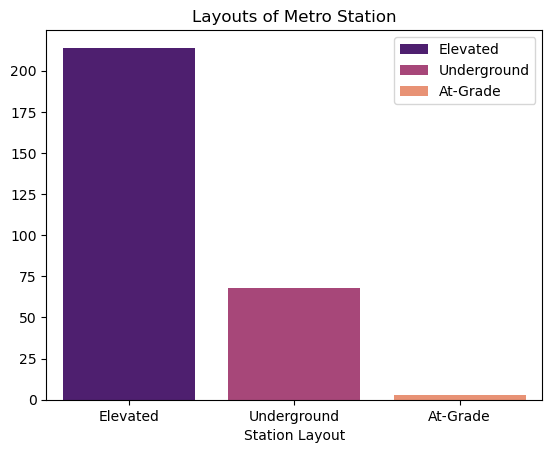

In [238]:
layout_wise=metro_df.groupby('Station Layout')['Station ID'].size().sort_values(ascending=False)
sns.barplot(x=layout_wise.index,y=layout_wise.values,palette='magma',hue=layout_wise.index,dodge=False)
plt.title("Layouts of Metro Station")
plt.legend()
plt.show()

In [245]:
line_data=metro_df.groupby('Line')['Station ID'].size()
dist_coverage=metro_df.groupby('Line')['Distance from Start (km)'].max()
dist_coverage

Line
Aqua line            27.1
Blue line            52.7
Blue line branch      8.1
Gray line             3.9
Green line           24.8
Green line branch     2.1
Magenta line         33.1
Orange line          20.8
Pink line            52.6
Rapid Metro          10.0
Red line             32.7
Voilet line          43.5
Yellow line          45.7
Name: Distance from Start (km), dtype: float64

In [261]:
line_df=pd.DataFrame({"No. of stations": line_data,
                    "Distance covered": dist_coverage.values})
line_df['Average Distance']=line_df['Distance covered']/(line_df['No. of stations']-1).round(2)

In [262]:
line_df

,No. of stations,Distance covered,Average Distance
Line,,,
Aqua line,21,27.1,1.355000
Blue line,49,52.7,1.097917
Blue line branch,8,8.1,1.157143
Gray line,3,3.9,1.950000
Green line,21,24.8,1.240000
Green line branch,3,2.1,1.050000
Magenta line,25,33.1,1.379167
Orange line,6,20.8,4.160000
Pink line,38,52.6,1.421622


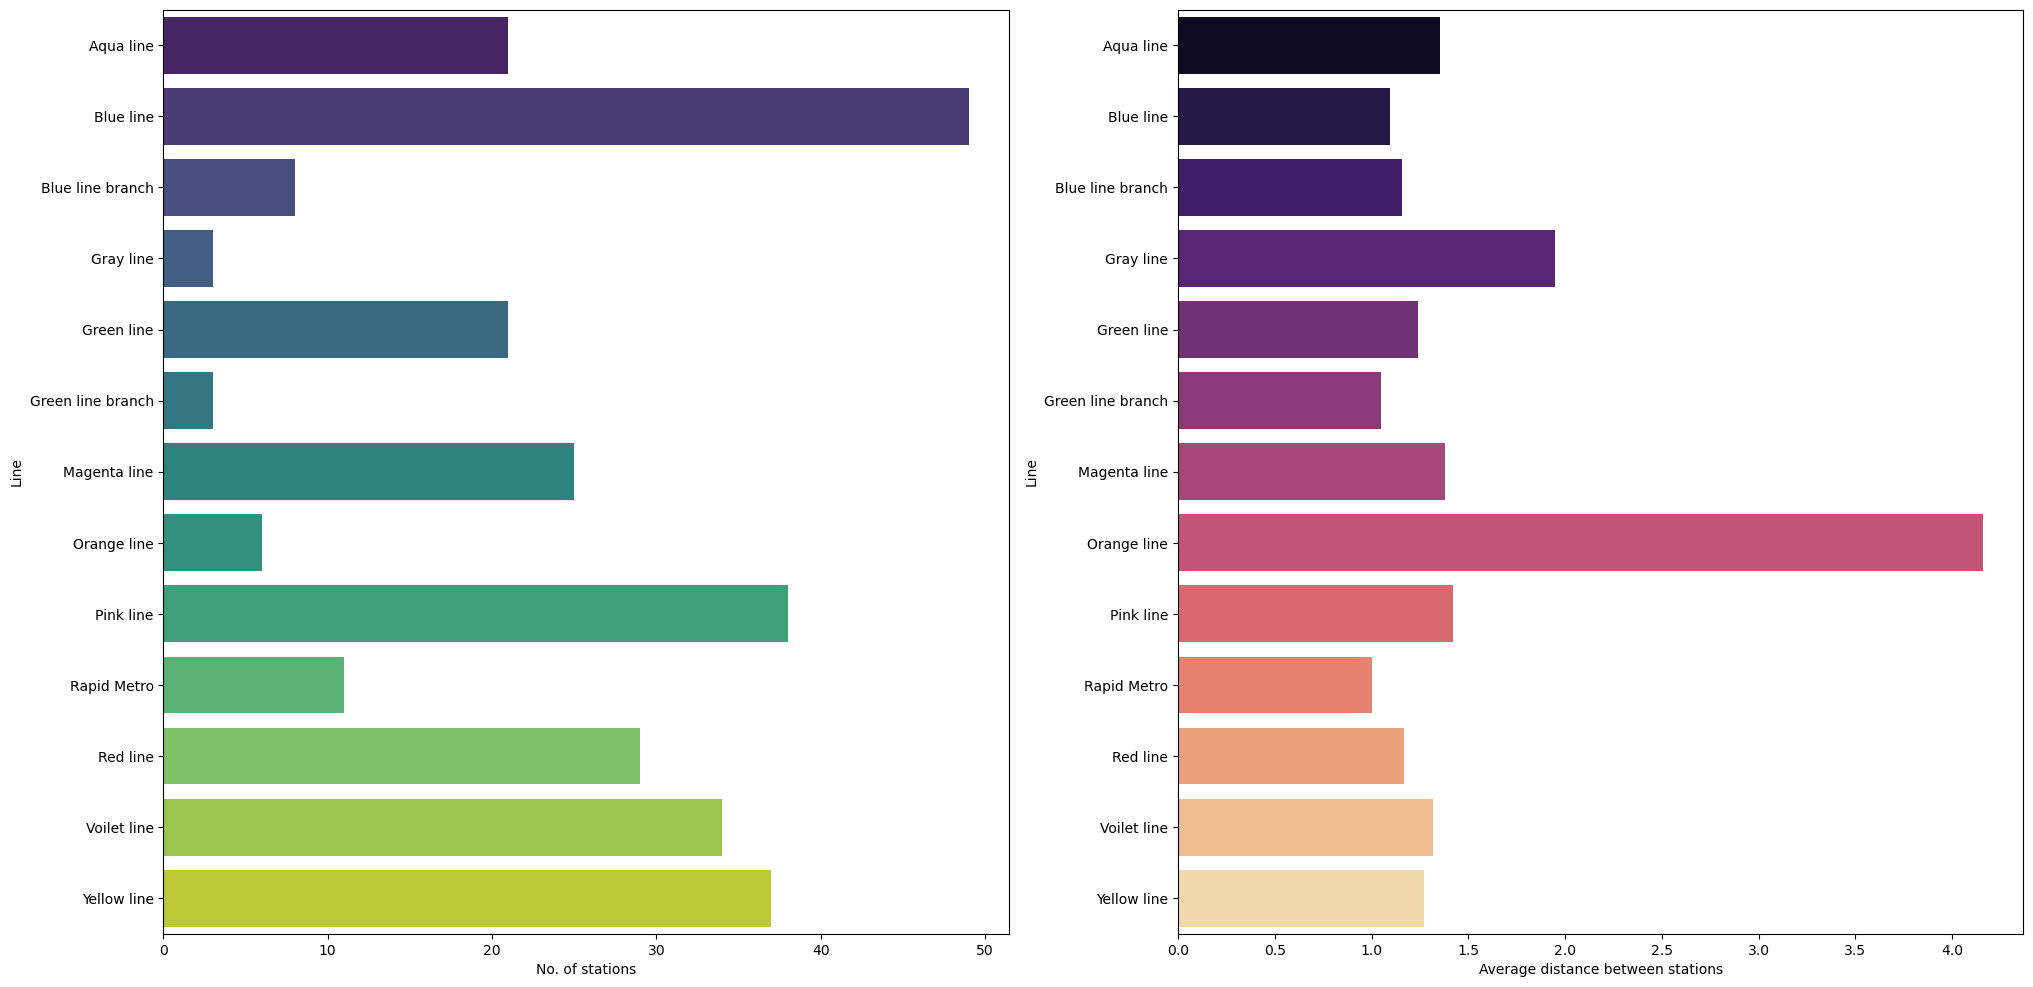

In [265]:
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
sns.barplot(data=line_df,y=line_df.index,x='No. of stations',palette='viridis')
plt.subplot(1,2,2)
sns.barplot(data=line_df,y=line_df.index,x='Average Distance',palette='magma')
plt.xlabel("Average distance between stations")
plt.show()

In [266]:
metro_df[metro_df['Line']=='Orange line']

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude,Year
72,73,IGI Airport,17.9,Orange line,2011-02-23,Underground,28.55693,77.08669,2011
94,95,Delhi Aerocity,14.5,Orange line,2011-08-15,Underground,28.54881,77.12092,2011
107,108,Shivaji Stadium,1.9,Orange line,2011-02-23,Underground,28.62901,77.21190,2011
172,173,Dhaula Kuan [Conn: Pink],8.3,Orange line,2011-08-15,Elevated,28.59178,77.16155,2011
249,250,New Delhi-Airport Express [Conn: Yellow],0.0,Orange line,2011-02-23,Underground,28.64307,77.22144,2011
278,279,Dwarka Sector 21 [Conn: Blue],20.8,Orange line,2011-02-23,Underground,28.55226,77.05828,2011
